## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

### Step 1: Reading and Understanding the data

In [366]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

# Importing the warning package to ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [367]:
# For viewing more columns 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [368]:
# Reading and Inspecting the dataset
housing_data = pd.read_csv("train.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [369]:
housing_data.shape

(1460, 81)

In [370]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [371]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Step 2: Data Cleaning

#### Checking and imputing/removing the null values in categorical columns

In [372]:
# Checking categorical columns that contain null values
housing_data.select_dtypes(include="object").isnull().sum()[housing_data.select_dtypes(include="object").isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [373]:
# Replacing NA with None in the above categorical columns
for column in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 
               'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'):
    
    housing_data[column]=housing_data[column].fillna('None')

In [374]:
# Checking once again for null values in categorical columns
housing_data.select_dtypes(include="object").isnull().sum()[housing_data.select_dtypes(include="object").isnull().sum()>0]

Series([], dtype: int64)

Therefore, there are no more null values left in any categorical column.

In [375]:
housing_data.shape

(1460, 81)

In [376]:
# Removing the categorical columns that have more than 90% data associated to a specific value
# As these are considered skewed to one value.
# And 90% of 1439 is 1295.

def HighlyCategorical():
    column = []
    categorical_columns = housing_data.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housing_data[col].value_counts().max() >= 1295):
            column.append(col)
    return column

RemovedColumns = HighlyCategorical()

# Removing the columns with skewed data

housing_data.drop(RemovedColumns, axis = 1, inplace = True)

housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,WD,Normal,250000


In [377]:
# Dropping the 'Id' column also
housing_data.drop('Id', axis = 1, inplace = True)

In [378]:
housing_data.shape

(1460, 63)

#### Checking and imputing/removing the null values in numerical columns

In [379]:
# Checking numerical columns that contain null values
housing_data.select_dtypes(include=['int','float']).isnull().sum()[housing_data.select_dtypes(include=['int','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [380]:
# Replacing the null values with median values for 'LotFrontage' and 'MasVnrArea' columns
housing_data['LotFrontage'] = housing_data['LotFrontage'].replace(np.nan, housing_data['LotFrontage'].median())
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].replace(np.nan, housing_data['MasVnrArea'].median())

In [381]:
# Replacing the null values with 0 for GarageYrBlt for now and we will be handling this column further below
housing_data['GarageYrBlt']=housing_data['GarageYrBlt'].fillna(0)
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].astype(int)

In [382]:
# Checking once again for null values in numerical columns
housing_data.select_dtypes(include=['int','float']).isnull().sum()[housing_data.select_dtypes(include=['int','float']).isnull().sum()>0]

Series([], dtype: int64)

#### Converting year to number of years (considering the current year for the calculation) in the year columns

In [383]:
from datetime import date

housing_data['YearBuilt'] = date.today().year - housing_data['YearBuilt']
housing_data['YearRemodAdd'] = date.today().year - housing_data['YearRemodAdd']
housing_data['GarageYrBlt'] = date.today().year - housing_data['GarageYrBlt']
housing_data['YrSold'] = date.today().year - housing_data['YrSold']

#### Outlier Treatment

In [384]:
housing_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,49.732192,36.134247,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,152.260274,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,13.184247,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,21.000000,17.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,20.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,12.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,48.000000,27.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,44.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,13.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,67.000000,54.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,63.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,14.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,96.100000,71.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,93.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,15.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,105.000000,71.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2021.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,15.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,121.820000,71.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000

In [385]:
# Removing the outliers by taking 0.25 and 0.99 as lower and upper quartile

num_col = list(housing_data.dtypes[housing_data.dtypes !='object'].index)

def drop_outliers(x):
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

housing_data = drop_outliers(housing_data)

In [386]:
housing_data.shape

(1439, 63)

In [387]:
print(num_col)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [388]:
print(len(num_col))

37


### Step 3: Exploratory Data Analysis (EDA)

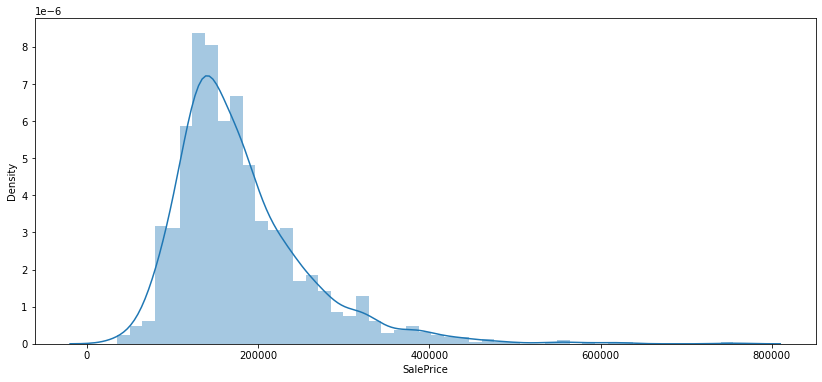

In [389]:
# Visualising the target variables which is 'SalePrice'
plt.figure(figsize=(14,6))
sns.distplot(housing_data.SalePrice)
plt.show()

In [390]:
# Since the target variable seems to be a little skewed, let's check its skewness
housing_data.SalePrice.skew()

1.7662229754714256

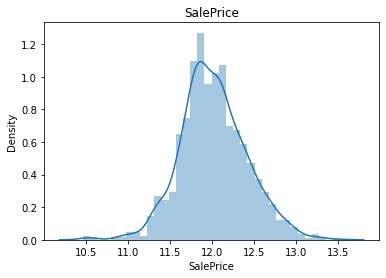

In [391]:
# Transforming the target variable
housing_data['SalePrice'] = np.log(housing_data['SalePrice'])

plt.title('SalePrice')
sns.distplot(housing_data['SalePrice'], kde=True)
plt.show()

In [392]:
# Checking the skewness of the target variable after its transformation
housing_data.SalePrice.skew()

0.1148144303899194

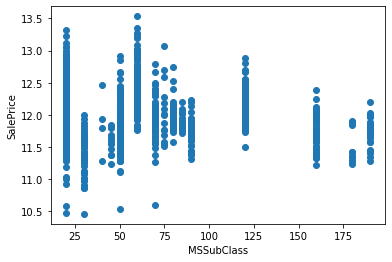

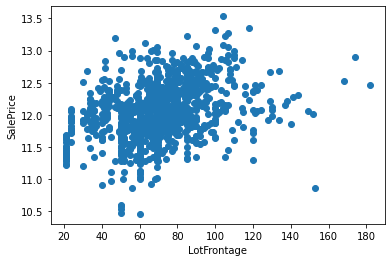

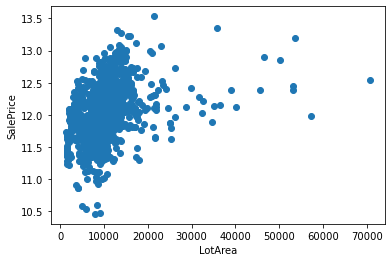

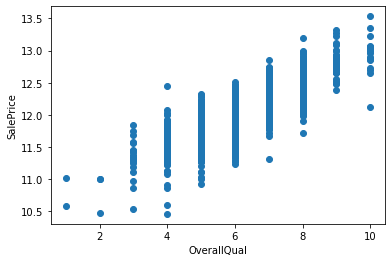

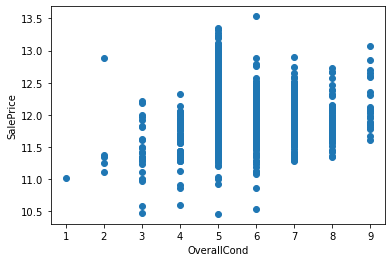

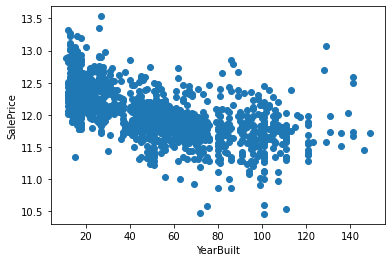

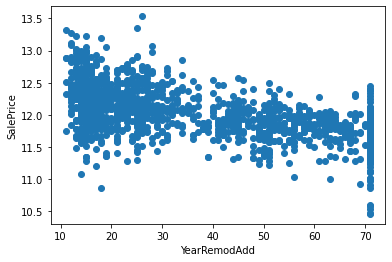

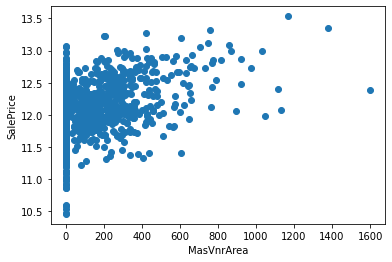

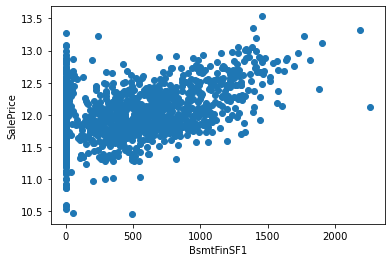

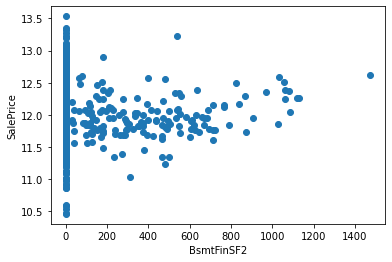

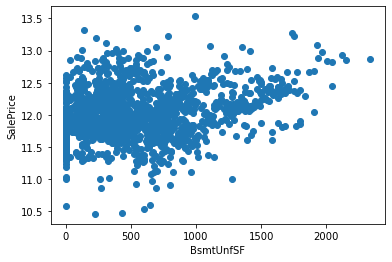

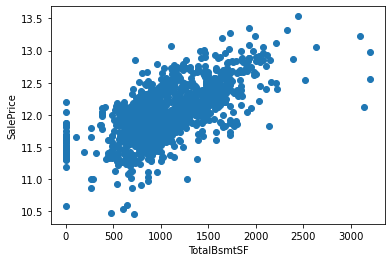

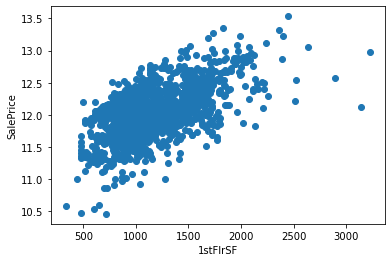

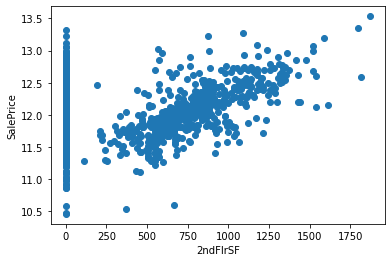

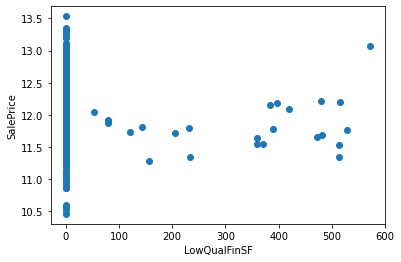

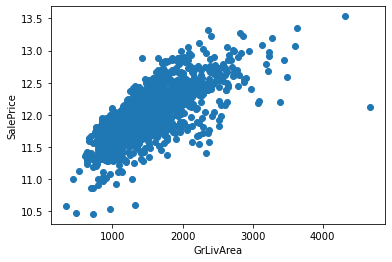

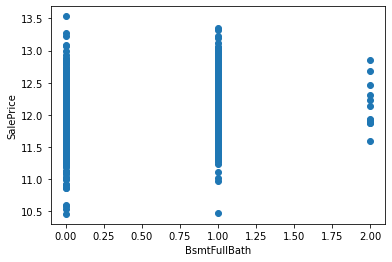

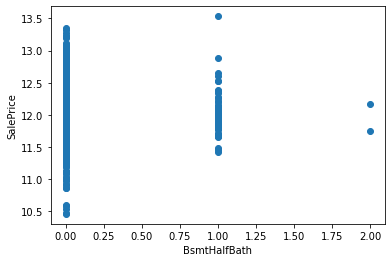

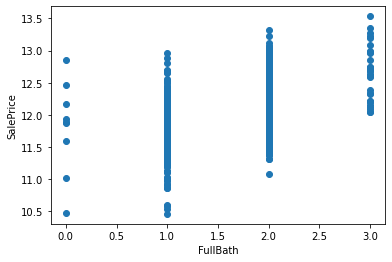

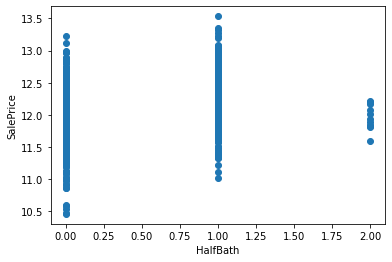

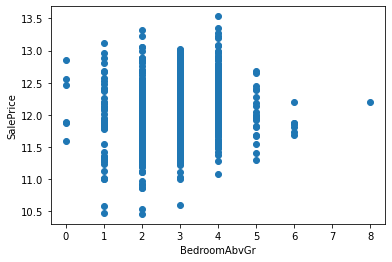

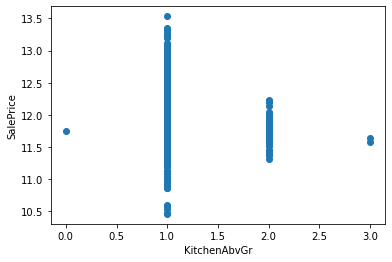

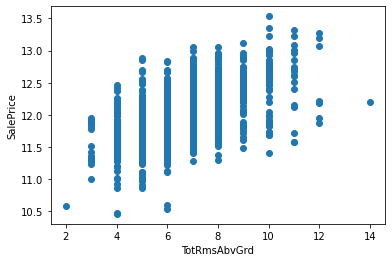

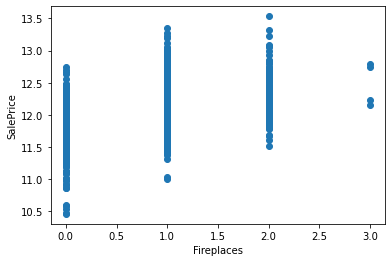

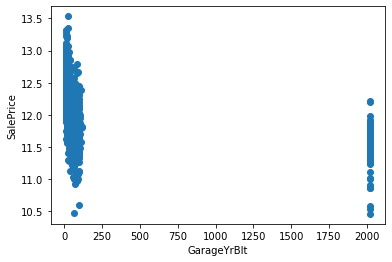

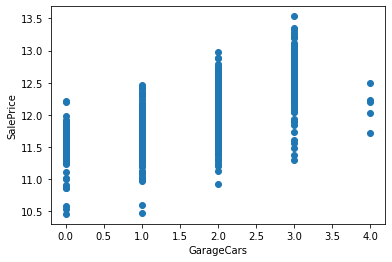

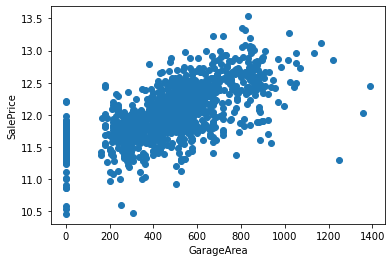

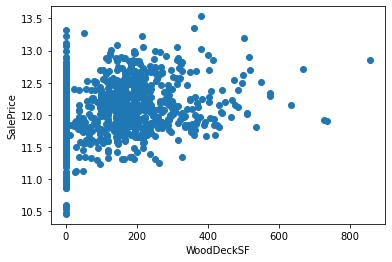

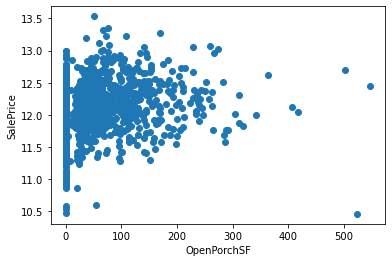

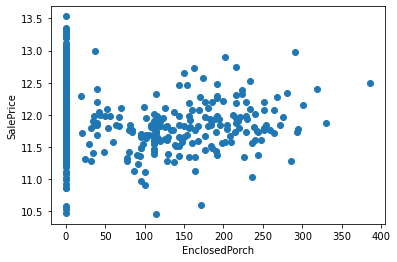

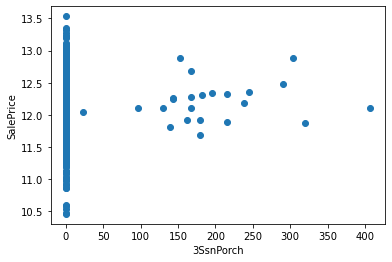

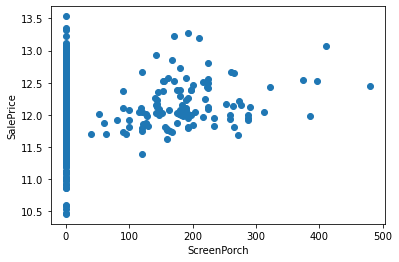

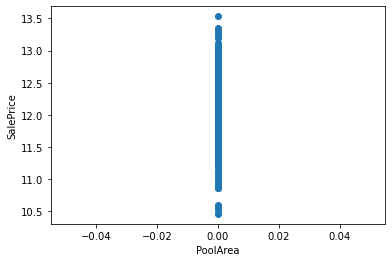

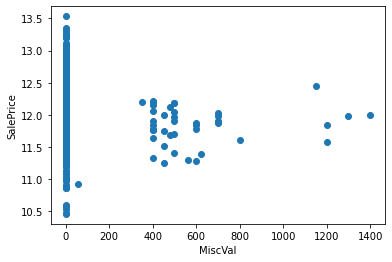

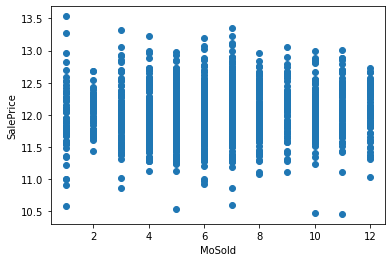

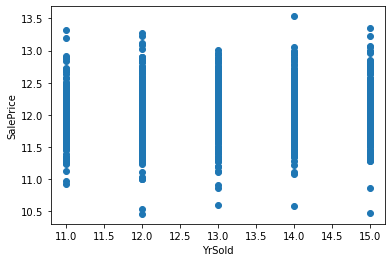

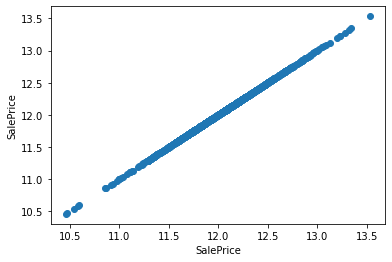

In [393]:
# Visualising the numerical columns using scatter plots
for col in num_col:
    plt.scatter(housing_data[col],housing_data.SalePrice)
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

#### Checking the correlation between the variables

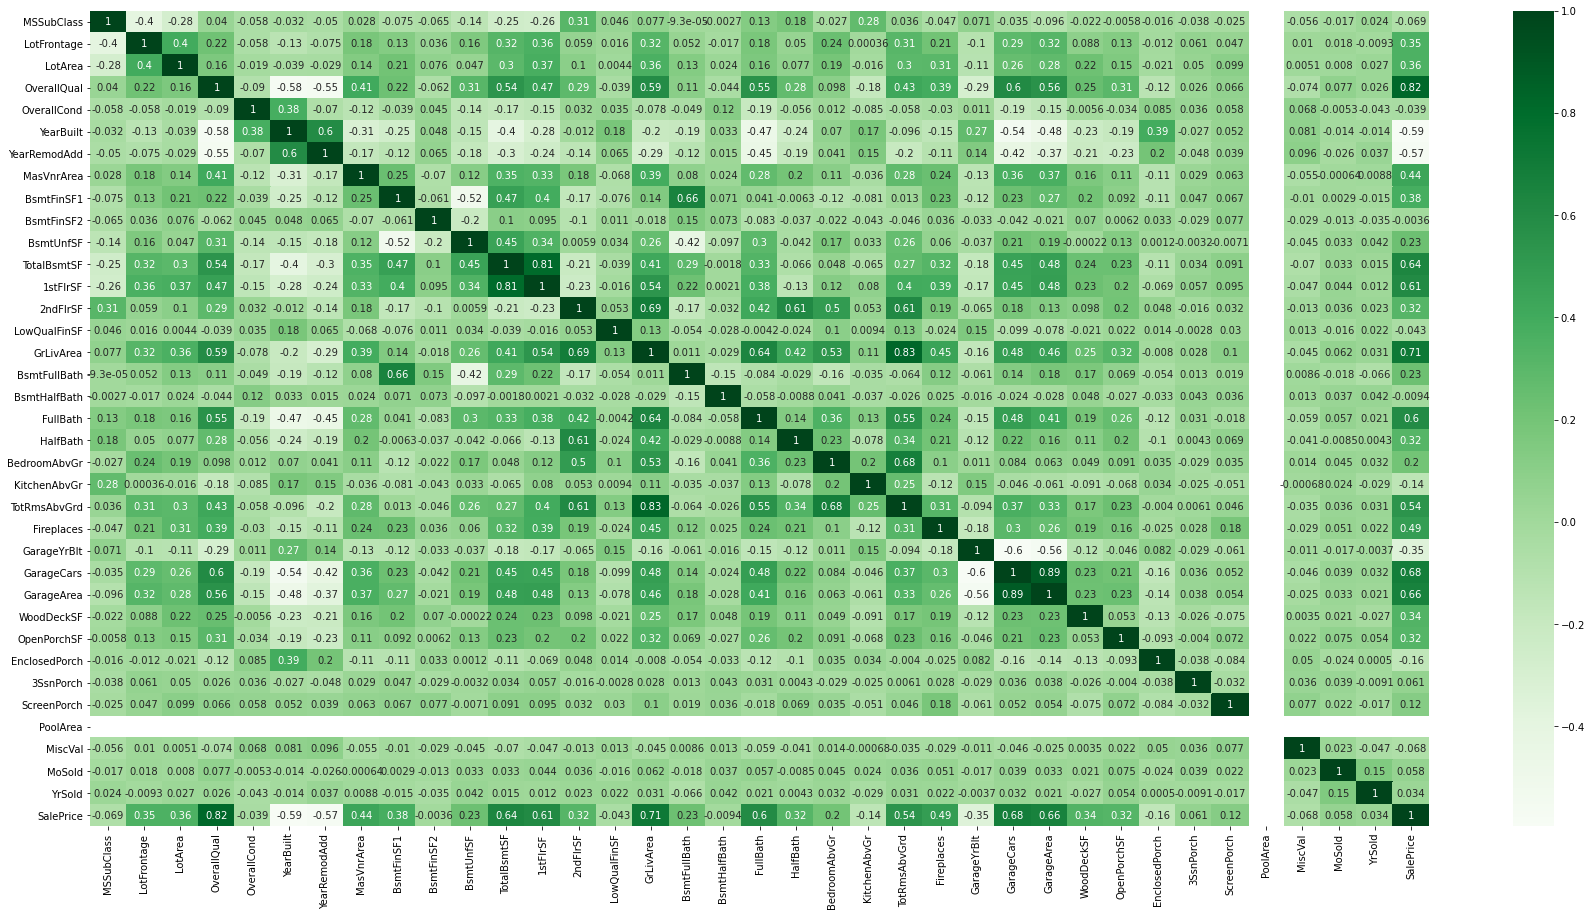

In [394]:
plt.figure(figsize = (30, 15))
sns.heatmap(housing_data.corr(), annot = True, cmap="Greens")
plt.show()

The columns 'TotRmsAbvGrd' and 'GrLivArea' show 83% correlation.
The columns 'Garage Area' and 'Garage Cars' show 89% correlation.

Dropping the columns that show high correlation

In [395]:
housing_data.drop(['TotRmsAbvGrd', 'GarageArea', 'PoolArea'], axis = 1, inplace = True)

In [396]:
housing_data.shape

(1439, 60)

### Step 4: Data Preparation

In [397]:
# Checking the columns that are ordinal in nature

housing_data[['ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',  'KitchenQual','GarageFinish',
             'ExterCond','LotShape', 'FireplaceQu', 'Fence']].head()

,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageFinish,ExterCond,LotShape,FireplaceQu,Fence
0,Gd,Gd,No,GLQ,Unf,Ex,Gd,RFn,TA,Reg,None,None
1,TA,Gd,Gd,ALQ,Unf,Ex,TA,RFn,TA,Reg,TA,None
2,Gd,Gd,Mn,GLQ,Unf,Ex,Gd,RFn,TA,IR1,TA,None
3,TA,TA,No,ALQ,Unf,Gd,Gd,Unf,TA,IR1,Gd,None
4,Gd,Gd,Av,GLQ,Unf,Ex,Gd,RFn,TA,IR1,TA,None


In [398]:
# Mapping the values in these columns with an ordered sequence value
housing_data['ExterQual'] = housing_data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['BsmtQual'] = housing_data.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['BsmtExposure'] = housing_data.BsmtExposure.map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_data['BsmtFinType1'] = housing_data.BsmtFinType1.map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_data['BsmtFinType2'] = housing_data.BsmtFinType2.map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_data['HeatingQC'] = housing_data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['KitchenQual'] = housing_data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['GarageFinish'] = housing_data.GarageFinish.map({'None':0,'Unf':1,'RFn':2,'Fin':3})
housing_data['ExterCond'] = housing_data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['LotShape'] = housing_data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_data['FireplaceQu'] = housing_data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['Fence'] = housing_data['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })

In [399]:
# Creating dummy variables

dummy_col = pd.get_dummies(housing_data[['MSZoning','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle',
            'RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation','GarageType','SaleType','SaleCondition']],
            drop_first=True)

housing_data = pd.concat([housing_data,dummy_col],axis='columns')

housing_data = housing_data.drop(['MSZoning','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle',
               'Exterior1st',  'Exterior2nd','MasVnrType','Foundation','GarageType','SaleType','SaleCondition'],axis=1)

### Step 5: Train-Test Split

In [400]:
df_train,df_test = train_test_split(housing_data, train_size=0.7,test_size = 0.3, random_state=42)

In [401]:
housing_data.head()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,7,5,18,18,196.0,3,2,4,1,6,706,1,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,0,0,18,2,2,0,61,0,0,0,0,0,2,13,12.247694,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,6,8,45,45,0.0,2,2,4,4,5,978,1,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,2,1,3,45,2,2,298,0,0,0,0,0,0,5,14,12.109011,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,0,7,5,20,19,162.0,3,2,4,2,6,486,1,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,3,1,3,20,2,2,0,42,0,0,0,0,0,9,13,12.317167,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,0,7,5,106,51,0.0,2,2,3,1,5,216,1,0,540,756,3,961,756,0,1717,1,0,1,0,3,1,3,1,4,23,1,3,0,35,272,0,0,0,0,2,15,11.849398,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,0,8,5,21,21,350.0,3,2,4,3,6,6

In [402]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 1459
Columns: 158 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int32(1), int64(42), uint8(112)
memory usage: 680.2 KB


In [403]:
housing_data.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.00000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.0000

In [404]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [405]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [406]:
# Scaling the data

num_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
            '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
            'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [407]:
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

(1007, 157) (432, 157)
(1007,) (432,)


### Step 6: Model Building

In [408]:
# Building a Regression model using RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

# Running RFE with number of variables output as 50
rfe = RFE(lr, 50)            
rfe = rfe.fit(X_train, y_train)

In [409]:
# Looking at the columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR3', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_PosN', 'BldgType_2fmCon', 'BldgType_Twnhs', 'HouseStyle_2.5Fin', 'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_Wd Sdng', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_Other', 'Exterior2nd_Wd Sdng', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'GarageType_Attchd', 'GarageType_CarPort', 'GarageType_None', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_New', 'SaleType_Oth', 'SaleCondition_AdjLand', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object')

In [410]:
# Building regression model with 50 features selected by RFE
X_train1 = X_train[cols]
X_test1 = X_test[cols]

In [411]:
lr.fit(X_train1, y_train)
lr.coef_

array([ 0.02153633,  0.06464265,  0.04129994,  0.01757054,  0.028361  ,
        0.04726588,  0.02419723, -0.02032299,  0.13422434,  0.01908007,
        0.03340855,  0.02131825,  0.05120552,  0.4575999 ,  0.47442863,
        0.44599253,  0.35424279, -0.07572772,  0.03141262,  0.14266931,
        0.11992333,  0.07522393,  0.10640114, -0.15261968, -0.08643949,
       -0.0666299 , -0.07720626,  0.05105922, -0.57806117, -0.10270264,
       -0.13742762, -0.0725085 , -0.10270264,  0.09592402, -0.06091409,
        0.05528337,  0.05283155,  0.11321628,  0.06766698,  0.04438623,
       -0.09692075, -0.04466493,  0.07674055,  0.20953402, -0.14250331,
        0.37969182,  0.11471212,  0.13172917,  0.05814921, -0.28512055])

In [412]:
# Calculating the metrics such as R2 score, RSS
y_train_pred = lr.predict(X_train1)
y_test_pred = lr.predict(X_test1)

metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9117171797976475
0.8863758183940089
14.12670504672946
7.564867211064486
0.014028505508172254
0.017511266692278902


### Ridge Regression

In [413]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# Cross-Validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [414]:
# Checking the value of optimal number of parameters
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 10.0}
-0.08486143274016926


In [415]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=1000]
ridge_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006208,0.002482,0.002961,0.002715,0.0001,{'alpha': 0.0001},-0.092682,-0.086464,-0.084209,-0.098435,-0.088419,-0.090042,0.005037,25,-0.067966,-0.071372,-0.067309,-0.068892,-0.072469,-0.069602,0.001990
1,0.006518,0.004949,0.000804,0.001163,0.001,{'alpha': 0.001},-0.092675,-0.086458,-0.084180,-0.098420,-0.088383,-0.090023,0.005041,24,-0.067966,-0.071372,-0.067309,-0.068885,-0.072461,-0.069599,0.001988
2,0.006217,0.004540,0.000393,0.000785,0.01,{'alpha': 0.01},-0.092576,-0.086403,-0.083971,-0.098338,-0.088129,-0.089883,0.005077,23,-0.067964,-0.071370,-0.067331,-0.068848,-0.072417,-0.069586,0.001973
3,0.004580,0.003049,0.001722,0.003445,0.1,{'alpha': 0.1},-0.091668,-0.086008,-0.083285,-0.098210,-0.087531,-0.089340,0.005199,22,-0.068139,-0.071373,-0.067538,-0.068964,-0.072352,-0.069673,0.001870
4,0.003201,0.002976,0.003625,0.003664,0.2,{'alpha': 0.2},-0.090962,-0.085746,-0.082938,-0.098128,-0.087350,-0.089025,0.005239,21,-0.068352,-0.071429,-0.067711,-0.069065,-0.072358,-0.069783,0.001800
5,0.000000,0.000000,0.006228,0.007645,0.3,{'alpha': 0.3},-0.090400,-0.085565,-0.082674,-0.097939,-0.087192,-0.088754,0.005228,20,-0.068551,-0.071572,-0.067892,-0.069144,-0.072422,-0.069916,0.001765
6,0.006665,0.008163,0.003347,0.006693,0.4,{'alpha': 0.4},-0.089962,-0.085435,-0.082432,-0.097709,-0.086999,-0.088508,0.005204,19,-0.068764,-0.071706,-0.068081,-0.069226,-0.072529,-0.070061,0.001738
7,0.006251,0.007655,0.000000,0.000000,0.5,{'alpha': 0.5},-0.089610,-0.085495,-0.082208,-0.097470,-0.086800,-0.088317,0.005158,18,-0.068966,-0.071814,-0.068272,-0.069298,-0.072647,-0.070199,0.001712
8,0.004852,0.006339,0.000000,0.000000,0.6,{'alpha': 0.6},-0.089316,-0.085590,-0.082005,-0.097229,-0.086588,-0.088146,0.005109,17,-0.069159,-0.071905,-0.068452,-0.069366,-0.072745,-0.070326,0.001682
9,0.001531,0.003061,0.006257,0.007663,0.7,{'alpha': 0.7},-0.089055,-0.085668,-0.081822,-0.096990,-0.086368,-0.087981,0.005064,16,-0.069356,-0.071988,-0.068616,-0.069431,-0.072828,-0.070444,0.001650


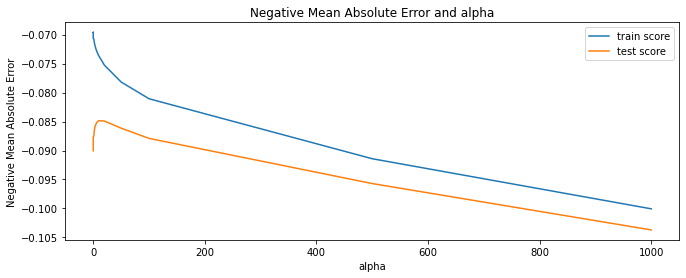

In [416]:
# Plotting mean test and train scores with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(11,4))

# Plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [417]:
# Getting the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=10.0)

In [418]:
# Checking the coefficient values with lambda = 10

alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train1, y_train)
ridge.coef_

array([ 0.02013141,  0.07171433,  0.04136845,  0.01595878,  0.02922576,
        0.04103136,  0.02183421, -0.01405318,  0.12699636,  0.01947661,
        0.03549158,  0.02176784,  0.0515991 ,  0.0857029 ,  0.06257408,
        0.08850245, -0.01089643, -0.02289911,  0.01333751,  0.11493029,
        0.09144806,  0.06416368,  0.05609247, -0.08617755, -0.05088316,
       -0.04297883, -0.03115715,  0.00519565, -0.07066587, -0.02132868,
       -0.02618927, -0.05724474, -0.02132868, -0.00729019, -0.00257248,
        0.02899683,  0.03144238,  0.09707157,  0.03298045,  0.04493276,
       -0.03237496, -0.03735701,  0.01210132,  0.04129679, -0.04049975,
        0.07917551,  0.03703672,  0.03688706,  0.06499465,  0.02044296])

In [419]:
# Calculating the metrics such as R2 score, RSS
y_train_pred = ridge.predict(X_train1)
y_test_pred = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9033461594247876
0.8979610889032377
15.466206157778077
6.79354343325735
0.015358695290742876
0.015725794984392014


### Lasso Regression

In [420]:
lasso = Lasso()

# Cross-Validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [421]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.078757,0.006577,0.002725,0.000999,0.0001,{'alpha': 0.0001},-0.089867,-0.085888,-0.081380,-0.098085,-0.084044,-0.087853,0.005814,2,-0.068998,-0.072264,-0.068620,-0.070012,-0.072789,-0.070537,0.001695
1,0.016791,0.002640,0.002583,0.001345,0.001,{'alpha': 0.001},-0.087384,-0.086892,-0.078442,-0.093305,-0.080568,-0.085318,0.005299,1,-0.076574,-0.077073,-0.075824,-0.074502,-0.078806,-0.076556,0.001420
2,0.007403,0.005816,0.000822,0.001007,0.01,{'alpha': 0.01},-0.099272,-0.097245,-0.089246,-0.103774,-0.089498,-0.095807,0.005664,3,-0.093069,-0.091861,-0.091652,-0.090929,-0.095739,-0.092650,0.001691
3,0.000949,0.001898,0.003333,0.006667,0.1,{'alpha': 0.1},-0.146968,-0.141899,-0.140191,-0.152734,-0.155616,-0.147481,0.005972,4,-0.143245,-0.142410,-0.143751,-0.144038,-0.149054,-0.144500,0.002343
4,0.006446,0.005077,0.004639,0.005606,0.2,{'alpha': 0.2},-0.203048,-0.189493,-0.206841,-0.208073,-0.219565,-0.205404,0.009679,5,-0.202530,-0.204253,-0.205294,-0.205412,-0.199648,-0.203427,0.002154
5,0.002648,0.002255,0.002555,0.002517,0.3,{'alpha': 0.3},-0.220795,-0.209574,-0.223670,-0.225949,-0.233026,-0.222603,0.007668,6,-0.221555,-0.224980,-0.221102,-0.219934,-0.217705,-0.221055,0.002372
6,0.001215,0.001970,0.003822,0.004683,0.4,{'alpha': 0.4},-0.220484,-0.209609,-0.223717,-0.226194,-0.233384,-0.222678,0.007793,7,-0.221710,-0.225124,-0.221045,-0.220131,-0.217889,-0.221180,0.002357
7,0.003299,0.004041,0.007140,0.007062,0.5,{'alpha': 0.5},-0.220242,-0.209726,-0.223822,-0.226475,-0.233756,-0.222804,0.007900,8,-0.221950,-0.225349,-0.221061,-0.220380,-0.218193,-0.221387,0.002338
8,0.007185,0.005890,0.001023,0.002046,0.6,{'alpha': 0.6},-0.220046,-0.209986,-0.224096,-0.226798,-0.234167,-0.223018,0.007980,9,-0.222253,-0.225626,-0.221171,-0.220661,-0.218585,-0.221659,0.002314
9,0.005331,0.006690,0.000000,0.000000,0.7,{'alpha': 0.7},-0.219973,-0.210462,-0.224473,-0.227246,-0.234802,-0.223391,0.008063,10,-0.222605,-0.225917,-0.221332,-0.221059,-0.219091,-0.222001,0.002258


In [422]:
# Checking the value of optimal number of parameters
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.001}
-0.08531818885710503


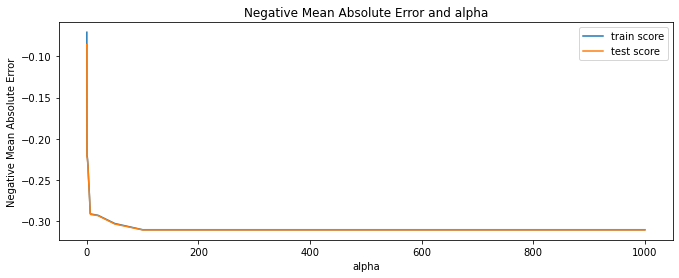

In [423]:
# Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# Plotting
plt.figure(figsize=(11,4))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [424]:
# Getting the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.001)

In [425]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 
lasso.coef_

array([ 0.01974364,  0.07566626,  0.04037403,  0.01393039,  0.02989736,
        0.03544679,  0.02022447, -0.00618747,  0.12097772,  0.01845692,
        0.03596564,  0.02133852,  0.05534591,  0.06820078,  0.        ,
        0.07185864, -0.03178805, -0.        , -0.        ,  0.10503517,
        0.07062399,  0.04422292,  0.00259243, -0.04406642, -0.00688368,
       -0.01225221, -0.        ,  0.        , -0.        , -0.        ,
       -0.00754764, -0.03161309, -0.        , -0.        ,  0.        ,
        0.        ,  0.01289384,  0.08484905,  0.        ,  0.04487871,
       -0.        , -0.01762845,  0.        ,  0.        , -0.        ,
        0.08608803,  0.        ,  0.        ,  0.05288914,  0.        ])

In [426]:
# Calculating the metrics such as R2 score, RSS
y_train_pred = lasso.predict(X_train1)
y_test_pred = lasso.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8978152522820733
0.8968450206704911
16.351242381891495
6.867848989168785
0.01623757932660526
0.015897798586038854


In [427]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.911717,0.903346,0.897815
1,R2 Score (Test),0.886376,0.897961,0.896845
2,RSS (Train),14.126705,15.466206,16.351242
3,RSS (Test),7.564867,6.793543,6.867849
4,RMSE (Train),0.118442,0.123930,0.127427
5,RMSE (Test),0.132330,0.125403,0.126086


### Let's observe the changes in the coefficients after regularization

In [428]:
betas = pd.DataFrame(index=X_train1.columns)

In [429]:
betas.rows = X_train1.columns

In [430]:
betas['Linear']  = lr.coef_
betas['Ridge']   = ridge.coef_
betas['Lasso']   = lasso.coef_

In [431]:
pd.set_option('display.max_rows', None)
betas.sort_values('Ridge', ascending=False)

,Linear,Ridge,Lasso
GrLivArea,0.134224,0.126996,0.120978
Neighborhood_Crawfor,0.142669,0.114930,0.105035
Foundation_PConc,0.113216,0.097072,0.084849
Neighborhood_NridgHt,0.119923,0.091448,0.070624
MSZoning_RL,0.445993,0.088502,0.071859
MSZoning_FV,0.457600,0.085703,0.068201
SaleType_New,0.379692,0.079176,0.086088
OverallQual,0.064643,0.071714,0.075666
SaleCondition_Normal,0.058149,0.064995,0.052889
Neighborhood_Somerst,0.075224,0.064164,0.044223


### Conclusion

The 10 most important variables that are useful in prediction are as follows:- 
* 'GrLivArea'
* 'Neighborhood_Crawfor'
* 'Foundation_PConc	'
* 'Neighborhood_NridgHt'
* 'MSZoning_RL'
* 'OverallQual'
* 'MSZoning_FV'
* 'SaleType_New'
* 'SaleCondition_Normal'
* 'Neighborhood_Somerst'

## Subjective Questions

#### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [432]:
print(ridge_model_cv.best_params_)
print(lasso_model_cv.best_params_)

{'alpha': 10.0}
{'alpha': 0.001}


In [433]:
# Doubling the value of alpha for Ridge Regression model

alpha = 2*10
rm = Ridge(alpha=alpha)
rm.fit(X_train1, y_train) 

# Calculating metrics such as R2 score, RSS

y_train_pred = rm.predict(X_train1)
y_test_pred = rm.predict(X_test1)

ridge_metrics = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
ridge_metrics.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
ridge_metrics.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
ridge_metrics.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
ridge_metrics.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
ridge_metrics.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
ridge_metrics.append(mse_test_lr**0.5)

0.8991568830123883
0.8977801585888097
16.136559371478526
6.805589406075445
0.01602438865092207
0.015753679180730198


In [434]:
# Doubling the value of alpha for Lasso Regression model

alpha = 2*0.001
lm = Lasso(alpha=alpha)
lm.fit(X_train1, y_train) 

# Calculating metrics such as R2 score, RSS

y_train_pred = lm.predict(X_train1)
y_test_pred = lm.predict(X_test1)

lasso_metrics = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
lasso_metrics.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
lasso_metrics.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
lasso_metrics.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
lasso_metrics.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
lasso_metrics.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
lasso_metrics.append(mse_test_lr**0.5)

0.892046701872862
0.8923686884807056
17.27430544208073
7.165874093769894
0.01715422586105336
0.016587671513356234


In [435]:
# Creating a table which contains all the metrics

lr_table1 = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric1 = pd.DataFrame(lr_table1 ,columns = ['Metric', 'Linear Regression'] )

rg_metric1 = pd.Series(ridge_metrics, name = 'Ridge Regression')
ls_metric1 = pd.Series(lasso_metrics, name = 'Lasso Regression')

final_metric1 = pd.concat([lr_metric1, rg_metric1, ls_metric1], axis = 1)

final_metric1

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.911717,0.899157,0.892047
1,R2 Score (Test),0.886376,0.897780,0.892369
2,RSS (Train),14.126705,16.136559,17.274305
3,RSS (Test),7.564867,6.805589,7.165874
4,RMSE (Train),0.118442,0.126587,0.130974
5,RMSE (Test),0.132330,0.125514,0.128793


In [436]:
betas1 = pd.DataFrame(index=X_train1.columns)

In [437]:
betas1.rows = X_train1.columns

In [438]:
betas1['Linear']  = lr.coef_
betas1['Ridge']   = rm.coef_
betas1['Lasso']   = lm.coef_

In [439]:
pd.set_option('display.max_rows', None)
betas1.sort_values('Ridge', ascending=False)

,Linear,Ridge,Lasso
GrLivArea,0.134224,0.120384,0.113479
Neighborhood_Crawfor,0.142669,0.083623,0.067971
Foundation_PConc,0.113216,0.080964,0.072409
OverallQual,0.064643,0.075648,0.080823
Neighborhood_NridgHt,0.119923,0.067015,0.040107
MSZoning_RL,0.445993,0.056315,0.012091
SaleType_New,0.379692,0.053749,0.061494
GarageCars,0.051206,0.053645,0.060286
SaleCondition_Normal,0.058149,0.053221,0.035837
MSZoning_FV,0.457600,0.052315,0.000000


In [440]:
ridge_param = pd.DataFrame({'Features':X_train1.columns, 'Coeficient':ridge.coef_})
ridge_param.sort_values('Coeficient', ascending=False).reset_index(drop=True).head(10)

,Features,Coeficient
0,GrLivArea,0.126996
1,Neighborhood_Crawfor,0.114930
2,Foundation_PConc,0.097072
3,Neighborhood_NridgHt,0.091448
4,MSZoning_RL,0.088502
5,MSZoning_FV,0.085703
6,SaleType_New,0.079176
7,OverallQual,0.071714
8,SaleCondition_Normal,0.064995
9,Neighborhood_Somerst,0.064164


In [441]:
ridge_param_df = pd.DataFrame({'Features':X_train1.columns, 'Coeficient':rm.coef_})
ridge_param_df = ridge_param_df.sort_values('Coeficient', ascending=False).reset_index(drop=True)
ridge_param_df.head(10)

,Features,Coeficient
0,GrLivArea,0.120384
1,Neighborhood_Crawfor,0.083623
2,Foundation_PConc,0.080964
3,OverallQual,0.075648
4,Neighborhood_NridgHt,0.067015
5,MSZoning_RL,0.056315
6,SaleType_New,0.053749
7,GarageCars,0.053645
8,SaleCondition_Normal,0.053221
9,MSZoning_FV,0.052315


In [442]:
print(ridge_param_df["Features"][:10].to_list())

['GrLivArea', 'Neighborhood_Crawfor', 'Foundation_PConc', 'OverallQual', 'Neighborhood_NridgHt', 'MSZoning_RL', 'SaleType_New', 'GarageCars', 'SaleCondition_Normal', 'MSZoning_FV']


If we chose double the value of alpha for both ridge and lasso, the R2 score for both train and test sets decreases by less than 1% and RSS and RMSE increases by less than 1%.
The most important predictor variables after the change is implemented are: 'GrLivArea', 'Neighborhood_Crawfor', 'Foundation_PConc', 'OverallQual', 'Neighborhood_NridgHt', 'MSZoning_RL', 'SaleType_New', 'GarageCars', 'SaleCondition_Normal', 'MSZoning_FV'

#### Question 2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

In [443]:
RidLas = final_metric1.drop(columns="Linear Regression")
RidLas

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.899157,0.892047
1,R2 Score (Test),0.897780,0.892369
2,RSS (Train),16.136559,17.274305
3,RSS (Test),6.805589,7.165874
4,RMSE (Train),0.126587,0.130974
5,RMSE (Test),0.125514,0.128793


By comparing metrics of Ridge Regression and Lasso Regression, we see that R2 score in Ridge Regression is higher than that in Lasso Regression, and RSS (Residual Sum of Squares) and RMSE (Root Mean Squared Error) in Ridge Regression is lower than that in Lasso Regression. Therefore, we choose Ridge Regression to apply as as it has least RSS and RMSE and highest R2score/R-squared value amongst all the regression models.

#### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [444]:
lasso_param_df = pd.DataFrame({'Features':X_train1.columns, 'Coeficient':lasso.coef_})
lasso_param_df = lasso_param_df.sort_values('Coeficient', ascending=False).reset_index(drop=True)
lasso_param_df.head(10)

,Features,Coeficient
0,GrLivArea,0.120978
1,Neighborhood_Crawfor,0.105035
2,SaleType_New,0.086088
3,Foundation_PConc,0.084849
4,OverallQual,0.075666
5,MSZoning_RL,0.071859
6,Neighborhood_NridgHt,0.070624
7,MSZoning_FV,0.068201
8,GarageCars,0.055346
9,SaleCondition_Normal,0.052889


In [445]:
Top5 = lasso_param_df["Features"][0:5]
Top5

0               GrLivArea
1    Neighborhood_Crawfor
2            SaleType_New
3        Foundation_PConc
4             OverallQual
Name: Features, dtype: object

In [446]:
# Dropping Top5 variables
df = X_train1.copy()
df.drop(columns = Top5, inplace=True)
df.shape

(1007, 45)

In [447]:
lasso1 = Lasso()

# Cross-Validation
lasso_model_cv1 = GridSearchCV(estimator = lasso1, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [448]:
# Getting the best estimator for lambda

lasso_model_cv1.best_estimator_

Lasso(alpha=0.001)

In [449]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001

lasso_1 = Lasso(alpha=alpha)
        
lasso_1.fit(df, y_train) 
lasso_1.coef_

array([ 0.03799041,  0.04414945,  0.01060527,  0.02873974,  0.05545276,
        0.0381112 ,  0.02967207, -0.00283877,  0.12087442,  0.07251253,
        0.1037915 ,  0.1098359 ,  0.03297021,  0.01034416, -0.10110896,
       -0.        ,  0.04976654,  0.07837417,  0.00177596,  0.03936876,
       -0.        , -0.        , -0.        ,  0.05228178,  0.        ,
       -0.        , -0.        ,  0.        , -0.04020827, -0.        ,
        0.        , -0.        ,  0.        , -0.10590417, -0.06045776,
        0.036532  , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.04537214,  0.05499886])

In [450]:
# Top5 features of lasso_1 model
Lass = pd.DataFrame({'Features':df.columns, 'Coefficient':lasso_1.coef_})
Lass = Lass.sort_values(by = 'Coefficient', ascending=False).reset_index(drop=True).head()
Lass

,Features,Coefficient
0,KitchenQual,0.120874
1,MSZoning_FV,0.109836
2,GarageCars,0.103792
3,Neighborhood_NridgHt,0.078374
4,Fireplaces,0.072513


In [451]:
print(Lass["Features"].to_list())

['KitchenQual', 'MSZoning_FV', 'GarageCars', 'Neighborhood_NridgHt', 'Fireplaces']


Therefore, the five most important predictor variables now are: 'KitchenQual', 'MSZoning_FV', 'GarageCars', 'Neighborhood_NridgHt', 'Fireplaces'.

#### Question 4
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

We can make sure that a model is robust and generalisable by ensuring that our model is not highly impacted by the outliers in the training data and for this, we should carry out outlier analysis and should retain only those that are relevant to the model. The implication of the same for the accuracy of the model is that the test accuracy is not much lesser than the training accuracy. This also helps in improving the accuarcy of the predictions made by the model. Confidence Intervals within 3-5 standard deviations might be useful at times to make the model robust.